In [180]:
##Unfair Casino##

In [280]:
import numpy as np
import scipy
import random
import matplotlib.pyplot as plt
import copy
%matplotlib inline

In [281]:
#Имеем 2 матрицы 
A = scipy.array([[0.95,0.05],[0.1,0.9]])
E = scipy.array([[1/6,1/6,1/6,1/6,1/6,1/6],[1/10,1/10,1/10,1/10,1/10,1/2]])#верояности для правильной и неправильной

In [282]:
print(A)
print(E)

[[ 0.95  0.05]
 [ 0.1   0.9 ]]
[[ 0.16666667  0.16666667  0.16666667  0.16666667  0.16666667  0.16666667]
 [ 0.1         0.1         0.1         0.1         0.1         0.5       ]]


In [283]:
n = len(A)# Найдем стационарное распределение 
def stationary_distribution(A):
    n = len(A)
    M1 = np.vstack(((A.transpose() - np.eye(n))[:-1],np.ones(n)))
    v1 = np.eye(n)[-1]
    p = np.linalg.solve(M1,v1)
    return p

In [284]:
s=stationary_distribution(A)

In [285]:
#функция создания вектора наблюдения x и вектора состояний y
#0-нечестный кубик, 1-честный кубик
#x[i] какое число выпало на кубике
n=200 #длина последовательности
x=np.full(n, 0)
y=np.full(n, 0)
k=random.random()

if k < s[0]: 
    y[0]=0
    t=random.randint(1,6)
    x[0]=t
elif k >= s[0]:
    y[0]=1
    r=random.randint(1,10)
    if r<6:
        x[0]=r
    else: 
        x[0]=6 #Нашли первые элементы

In [286]:
i=1 #найдем остальные элементы векторов 
while i < n:
    if y[i-1]==0:
        r1=random.randint(1,20)
        if r1<19:
            y[i]=0
        elif r1==20:
            y[i]=1
    elif y[i-1]==1:        
        t=random.randint(1,10) 
        if t==1:
            y[i]=0
        elif t >= 2:
            y[i]=1
    if y[i]==0:
        t1=random.randint(1,6)
        x[i]=t1
        
    elif y[i]==1:
        r2=random.randint(1,10)
        if r2<6:
            x[i]=r2
        else: 
            x[i]=6    
    i=i+1

In [287]:
print(*x, sep=" ")
print(*y, sep=" ") #0-неправильная, 1-правильная
#получили первый:вектор наблюдения, второй: вектор состояния

6 6 2 6 6 5 3 4 2 1 5 2 1 5 4 2 1 4 5 4 6 6 6 6 1 5 1 6 3 6 3 1 2 2 6 5 1 2 5 5 6 6 3 1 3 1 1 4 5 1 6 6 5 4 6 3 6 6 6 6 4 5 1 6 5 4 6 5 6 1 6 2 5 2 6 5 2 4 6 6 5 4 2 5 6 3 6 4 1 6 6 6 6 2 6 6 6 6 3 6 6 6 4 1 1 5 1 1 1 5 1 4 3 2 1 5 3 1 6 6 1 4 6 6 1 6 6 6 6 6 6 6 2 1 5 1 6 1 5 4 3 4 6 6 6 6 1 6 5 4 6 2 4 6 6 6 6 1 3 6 6 4 6 3 2 3 3 2 2 5 2 5 3 5 5 2 5 4 5 5 2 3 1 2 3 6 4 1 3 1 2 3 6 5 4 1 6 2 1 5
0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [288]:
#Алгоритм Витерби
#Найдем наиболее вероятную последовательность состояний при данной последовательности наблюдения(х)
n=200
V=np.zeros((2, n))
P=np.zeros((2, n))

In [289]:
def Viterby(x, A, E):
    n = len(x)
    V=np.zeros((2, n))
    P=np.zeros((2, n))
    V[:, 0] = s*E[:, x[0] - 1]
    n = len(x)
    m = np.zeros(n)
    m[0] = max(V[:, 0])
    V[:, 0] /= m[0]
    for i_1 in range(1, n):
        for j_1 in range(2):
            S = E[j_1, x[i_1]-1]*V[:, i_1-1]*A[:, j_1]
            #S = E[j, x[i_1-1]]*V[:, i_1-1]*A[:, j_1]
            V[j_1,i_1] = max(S)
            P[j_1,i_1] = np.argmax(S)
    p0 = np.zeros(n)
    p0[-1] = np.argmax(V[:,-1])
    for i_1 in range(n-2,-1,-1):
        p0[i_1] = P[int(p0[i_1+1]),i_1+1]
    return p0

In [290]:
V_b = Viterby(x, A, E)

In [291]:
print(*V_b, sep=" ")

1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0


In [292]:
def P_Viterby(y, p0):
    n = len(y)
    s = 0
    for i in range(n):
        if y[i] == p0[i]:
            s+=1
    return round(s/n,2)


In [338]:
P_V = np.zeros(n)
for t in range(n):
    P_V[t] = P_Viterby(y, V_b)
#P_V
e0=sum(P_V)/n
print('Выборочное среднее:', e0)

Выборочное среднее: 0.79


In [312]:
#Алгоритм Форвард 
#найдем вероятность попадания в y[i] зная x[0],..,x[i]
V1=np.zeros((2, n))
V1[0,0]=s[0]*E[0][x[0]-1]
V1[1,0]=s[1]*E[1][x[0]-1]
#добавляем нормировку 
norm=np.zeros(n)
norm[0]=max(s[0]*E[0][x[0]-1],s[1]*E[1][x[0]-1])
V1[0][0]/=norm[0]
V1[1][0]/=norm[0]

In [313]:
j=1
while j < len(x):
    s1 = A[0][0]*V1[0][j-1],A[1][0]*V1[1][j-1]
    s2 = A[0][1]*V1[0][j-1],A[1][1]*V1[1][j-1]
    V1[0][j]=E[0][x[j]-1]*sum(s1)
    V1[1][j]=E[1][x[j]-1]*sum(s2)
    norm[j]=max(V1[0][j],V1[1][j])
    V1[0][j]/=norm[j]
    V1[1][j]/=norm[j]
    #P_norm=sum(V1[0,-1],V1[1,-1])
    j=j+1

In [314]:
p1 = V1[0,n-1]+V1[1,n-1]

In [316]:
#Алгоритм обратного хода
V2=np.zeros((2, n))
norm1=np.zeros(n)
norm1[n-1]=1
V2[0,n-1]=V2[1,n-1]=1

In [317]:
for u in range(n-2,-1,-1):
    sr = A[0,0]*V2[0,u+1]*E[0,x[u+1]-1],A[0,1]*V2[1,u+1]*E[1,x[u+1]-1]
    st = A[1,0]*V[0,u+1]*E[0,x[u+1]-1],A[1,1]*V[1,u+1]*E[1,x[u+1]-1]
    V2[0,u]=sum(sr)
    V2[1,u]=sum(st)
    norm1[u]=max(V2[0,u],V2[1,u])
    V2[0,u]/=norm1[u]
    V2[1,u]/=norm1[u]

In [318]:
p2=s[0]*V2[0,0]+s[1]*V2[1,0]

In [320]:
#Апостериорное дешифрование
pr=np.zeros(n)
k=1
while k < len(x):
    pr[k]=(V1[0,k]*V2[0,k])/p2
    k=k+1

In [310]:
pr

array([ 0.        ,  0.39285714,  0.95501956,  0.37820348,  0.18602145,
        0.60089774,  1.30585037,  1.5       ,  1.5       ,  1.5       ,
        1.5       ,  1.5       ,  1.5       ,  1.5       ,  1.5       ,
        1.5       ,  1.5       ,  1.5       ,  1.5       ,  1.5       ,
        1.5       ,  1.31598276,  0.49448526,  0.22541284,  0.66875423,
        1.41913963,  1.5       ,  0.89556195,  1.5       ,  0.64392829,
        1.3777562 ,  1.5       ,  1.5       ,  1.5       ,  1.5       ,
        1.5       ,  1.5       ,  1.5       ,  1.5       ,  1.5       ,
        1.5       ,  1.0974031 ,  1.5       ,  1.5       ,  1.5       ,
        1.5       ,  1.5       ,  1.5       ,  1.5       ,  1.5       ,
        1.5       ,  1.24645022,  1.5       ,  1.5       ,  1.29428783,
        1.5       ,  0.83769761,  0.33975968,  0.1729246 ,  0.11565865,
        0.4791986 ,  1.10126696,  1.5       ,  0.74565121,  1.5       ,
        1.5       ,  0.95344474,  1.5       ,  0.67294219,  1.42

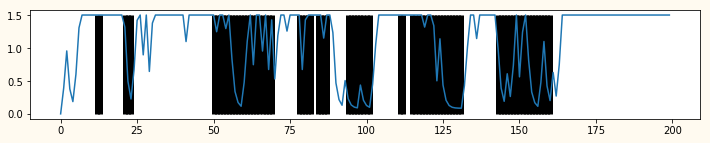

In [339]:
i=0
fig, ax = plt.subplots()
x_plot = np.arange(n)
y_plot = pr
for i in range(0,n):
    if y[i]==1:
        ax.vlines(i,0,1.5,linewidth = 1000/n)
ax.plot(x_plot, y_plot)
fig.set_figwidth(12)
fig.set_figheight(2)
fig.set_facecolor('floralwhite')
plt.show()